In [8]:
import numpy as np
import matplotlib.pyplot as plt

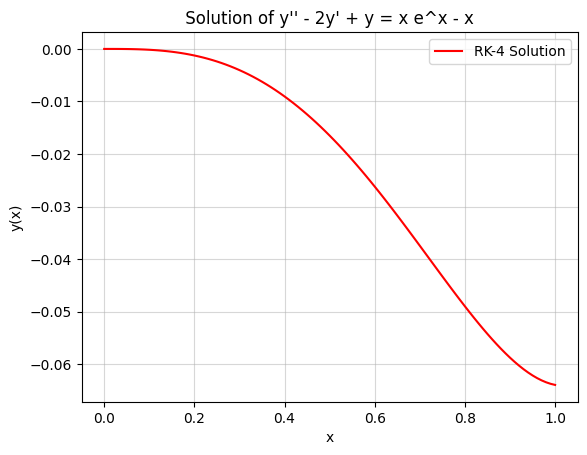

In [9]:

# define the function for the differential equation
def f1(x, u):
    y, z = u    # u is a vector , u =(y, z) where z = dy/dx
    dydt = z
    dzdt = x * (np.exp(x) - 1) - x + z - 2 * y
    return np.array([dydt, dzdt]) 


# function for each step of rk4
def rk4_step(f, t, y, h):
    k1 = h * f(t, y)
    k2 = h * f(t + 0.5 * h, y + 0.5 * k1)
    k3 = h * f(t + 0.5 * h, y + 0.5 * k2)
    k4 = h * f(t + h, y + k3)
    y_next = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

    return y_next

# function to implement rk4 method
def rk4_method(f, t0, tf, u0, h):
    n = int((tf-t0)/h)
    t_values = [t0 + i*h for i in range(n+1)]

    u_values = np.zeros((len(t_values), len(u0)))

    u_values[0] = u0

    for i in range(1, n+1):
        u_values[i] = rk4_step(f, t_values[i-1], u_values[i-1], h)

    return t_values, u_values


x0 = 0  # initial x
xf = 1  # Final x

y0 = 0 # value of y(0)
z0 = 0 # value of y'(0)
u0 = np.array([y0, z0])   # initial value of u

h = 0.01  # Step size

# solve the differential equations
x_values, u_values = rk4_method(f1, x0, xf, u0, h)
y_values = u_values[:, 0]

# Plot the results
plt.plot(x_values, y_values, label='RK-4 Solution', color = 'r')
plt.xlabel("x")
plt.ylabel("y(x)")
plt.title(" Solution of y'' - 2y' + y = x e^x - x ")
plt.legend()
plt.grid(True, alpha = 0.5 )
plt.show()
